<a href="https://colab.research.google.com/github/aSafarpoor/Seminar/blob/main/simple_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from tqdm import tqdm
import random
from collections import Counter
import pandas as pd
import numpy as np
import pickle

#simple using nx

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
G = nx.Graph()

G.add_nodes_from(['A','B','C','D'],type ='c')
G.add_nodes_from([1,2,3],type ='int')

G.add_edge('A', 'B', weight=4, type='t1')
G.add_edge('B', 'D', weight=2, type='t1')
G.add_edge('A', 'C', weight=3, type='t2')
G.add_edge('C', 'D', weight=4, type='t2')

nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

In [36]:
for n, nbrs in G.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       print(n,nbr,wt,eattr)

A B 4 {'weight': 4, 'type': 't1'}
A C 3 {'weight': 3, 'type': 't2'}
B A 4 {'weight': 4, 'type': 't1'}
B D 2 {'weight': 2, 'type': 't1'}
C A 3 {'weight': 3, 'type': 't2'}
C D 4 {'weight': 4, 'type': 't2'}
D B 2 {'weight': 2, 'type': 't1'}
D C 4 {'weight': 4, 'type': 't2'}


In [37]:
G.adj['A']

AtlasView({'B': {'weight': 4, 'type': 't1'}, 'C': {'weight': 3, 'type': 't2'}})

In [40]:
CG = nx.complete_graph(n=10)
print(CG.nodes)
print(CG.edges)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


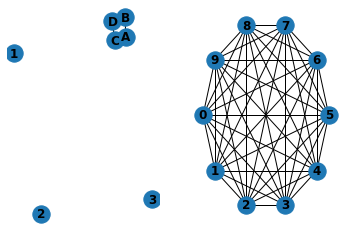

In [43]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(CG, with_labels=True, font_weight='bold')

# phase 2: best neighbour

In [49]:
G = nx.Graph()

G.add_edge("a", "b", weight=0.6, type='T')
G.add_edge("a", "c", weight=0.2, type='T')
G.add_edge("c", "d", weight=0.1, type='T')
G.add_edge("c", "e", weight=0.7, type='Z')
G.add_edge("c", "f", weight=0.9, type='Z')
G.add_edge("a", "d", weight=0.3, type='Z')
G.add_edge("a", "d", weight=0.4, type='Z')
G.add_edge("a", "d", weight=0.3, type='ZT')


c = 0 
for (u, v, d) in G.edges(data=True):
    print (c,'-->', u, v, d)
    c+=1 

0 --> a b {'weight': 0.6, 'type': 'T'}
1 --> a c {'weight': 0.2, 'type': 'T'}
2 --> a d {'weight': 0.3, 'type': 'ZT'}
3 --> c d {'weight': 0.1, 'type': 'T'}
4 --> c e {'weight': 0.7, 'type': 'Z'}
5 --> c f {'weight': 0.9, 'type': 'Z'}


In [52]:
G.adj['a']

AtlasView({'b': {'weight': 0.6, 'type': 'T'}, 'c': {'weight': 0.2, 'type': 'T'}, 'd': {'weight': 0.3, 'type': 'ZT'}})

In [54]:
for nbr in G.adj['a']:
    print(nbr,G.adj['a'][nbr]['weight'])

b 0.6
c 0.2
d 0.3
